<a href="https://colab.research.google.com/github/manojec054/Assignment/blob/master/MNIST_FASION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(f"X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"X_train = {X_test.shape}, y_train = {y_test.shape}")

X_train = (60000, 28, 28), y_train = (60000,)
X_train = (10000, 28, 28), y_train = (10000,)


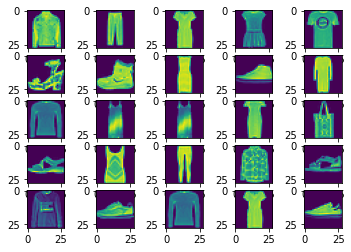

In [4]:
for i in range(0, 25):
  num = np.random.randint(100)
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[num])

plt.show()

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2), activation=tf.nn.relu, kernel_initializer=tf.initializers.he_uniform, input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(100, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [8]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrix = tf.keras.metrics.SparseCategoricalAccuracy()
optimizer = tf.keras.optimizers.Adam()

model.compile(loss=loss, metrics=metrix, optimizer=optimizer)

In [9]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=120)

Epoch 1/100
500/500 [==============================] - 3s 3ms/step - loss: 0.8461 - sparse_categorical_accuracy: 0.6873 - val_loss: 0.3773 - val_sparse_categorical_accuracy: 0.8615
Epoch 2/100
500/500 [==============================] - 1s 3ms/step - loss: 0.4008 - sparse_categorical_accuracy: 0.8579 - val_loss: 0.3259 - val_sparse_categorical_accuracy: 0.8820
Epoch 3/100
500/500 [==============================] - 2s 3ms/step - loss: 0.3293 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.2992 - val_sparse_categorical_accuracy: 0.8921
Epoch 4/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2965 - sparse_categorical_accuracy: 0.8911 - val_loss: 0.2789 - val_sparse_categorical_accuracy: 0.8996
Epoch 5/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2712 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.2693 - val_sparse_categorical_accuracy: 0.9005
Epoch 6/100
500/500 [==============================] - 1s 3ms/step - loss: 0.2472 - sparse_cate

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1384960   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0